# Milestone 4 - Independent Project

## Author - Ajai Shukla



In [1]:
# Load necessary libraries
import pandas as pd
import scipy.stats as ss
from scipy.stats import norm
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
import statsmodels.stats.weightstats as ws
import statsmodels.stats.power as smsp
import numpy as np
from math import sqrt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from operator import add
import math
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# MileStone 1->Load the data--Visualization - King County House Data Author
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"
house_df = pd.read_csv(url)
## MileStone 2 --Automobile Data -- statistical analysis and hypothesis testing to the data 
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"
## MileStone 3-- The dataset is the production amount of several diary products in California, month by month, for 18 years. Our goal: forecast the next year production for one of those products: milk.
file = r"C:\Users\ashukla\Documents\DS\cadairydata.csv"

Visualization - King County House Data Author - Ajai Shukla Problem Statement:

In [3]:
house_df = pd.read_csv(url)

In [4]:
##Initial Exploration
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
# convet to date to datetime
house_df['date'] = pd.to_datetime(house_df['date'])

In [7]:
# look for any null values
house_df.isnull().values.any()

False

In [8]:
# investigate outliers in bedrooms - this was noticed in the pairplots and then moved here to improve results
house_df.loc[house_df['bedrooms'] > 12, 'bedrooms']

15870    33
Name: bedrooms, dtype: int64

In [9]:
# remove outlier
house_df.drop(house_df[house_df['bedrooms'] > 12].index, inplace=True)

In [10]:
house_df.loc[house_df['price'] > 4000000, 'price']

1164     5110800.0
1315     5300000.0
1448     5350000.0
2626     4500000.0
3914     7062500.0
4411     5570000.0
7252     7700000.0
8092     4668000.0
8638     4489000.0
9254     6885000.0
12370    4208000.0
Name: price, dtype: float64

In [11]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


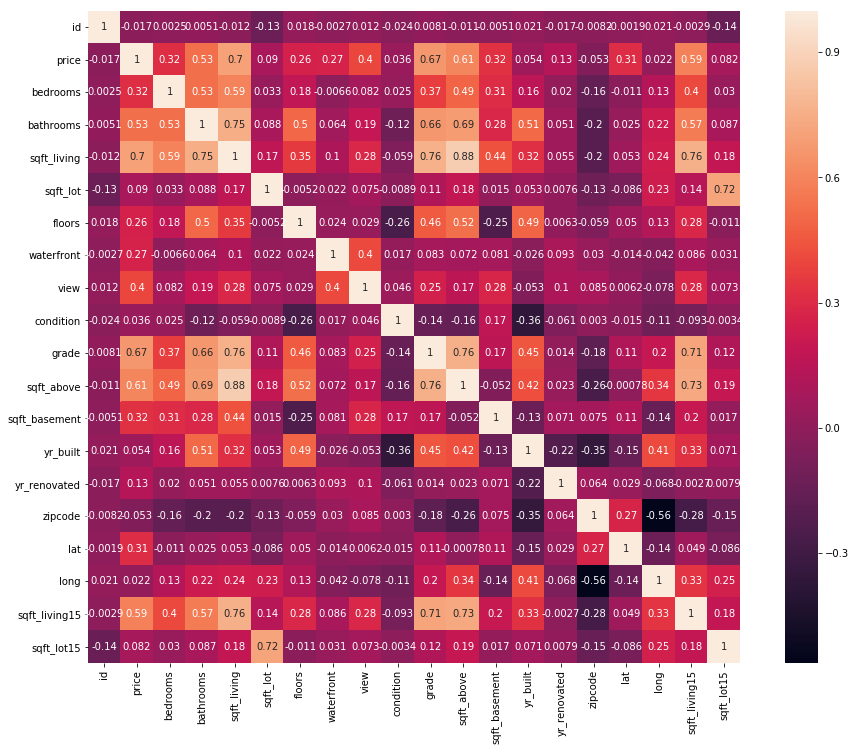

In [12]:
corrmat = house_df.corr()
ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, annot=True)

In [13]:
corrmat[['price']].sort_values(by=['price'], ascending=False)

,price
price,1.000000
sqft_living,0.702047
grade,0.667447
sqft_above,0.605591
sqft_living15,0.585404
bathrooms,0.525147
view,0.397299
sqft_basement,0.323812
bedrooms,0.315445
lat,0.306998


In [14]:
# Sort correlation matrix - technique from https://stackoverflow.com/a/17778786
corr_unstack = corrmat.unstack()
corr_sorted = corr_unstack.sort_values(kind='quicksort')
corr_sorted.head(20)

zipcode        long            -0.564065
long           zipcode         -0.564065
yr_built       condition       -0.361380
condition      yr_built        -0.361380
zipcode        yr_built        -0.346859
yr_built       zipcode         -0.346859
zipcode        sqft_living15   -0.279020
sqft_living15  zipcode         -0.279020
condition      floors          -0.263706
floors         condition       -0.263706
sqft_above     zipcode         -0.261177
zipcode        sqft_above      -0.261177
sqft_basement  floors          -0.245684
floors         sqft_basement   -0.245684
yr_built       yr_renovated    -0.224885
yr_renovated   yr_built        -0.224885
bathrooms      zipcode         -0.203858
zipcode        bathrooms       -0.203858
sqft_living    zipcode         -0.199421
zipcode        sqft_living     -0.199421
dtype: float64

In [15]:
corr_sorted.tail(60)

bathrooms      yr_built         0.506012
yr_built       bathrooms        0.506012
sqft_above     floors           0.523866
floors         sqft_above       0.523866
price          bathrooms        0.525147
bathrooms      price            0.525147
bedrooms       bathrooms        0.529159
bathrooms      bedrooms         0.529159
sqft_living15  bathrooms        0.568628
bathrooms      sqft_living15    0.568628
price          sqft_living15    0.585404
sqft_living15  price            0.585404
sqft_living    bedrooms         0.591467
bedrooms       sqft_living      0.591467
sqft_above     price            0.605591
price          sqft_above       0.605591
bathrooms      grade            0.664979
grade          bathrooms        0.664979
               price            0.667447
price          grade            0.667447
bathrooms      sqft_above       0.685339
sqft_above     bathrooms        0.685339
sqft_living    price            0.702047
price          sqft_living      0.702047
grade          s

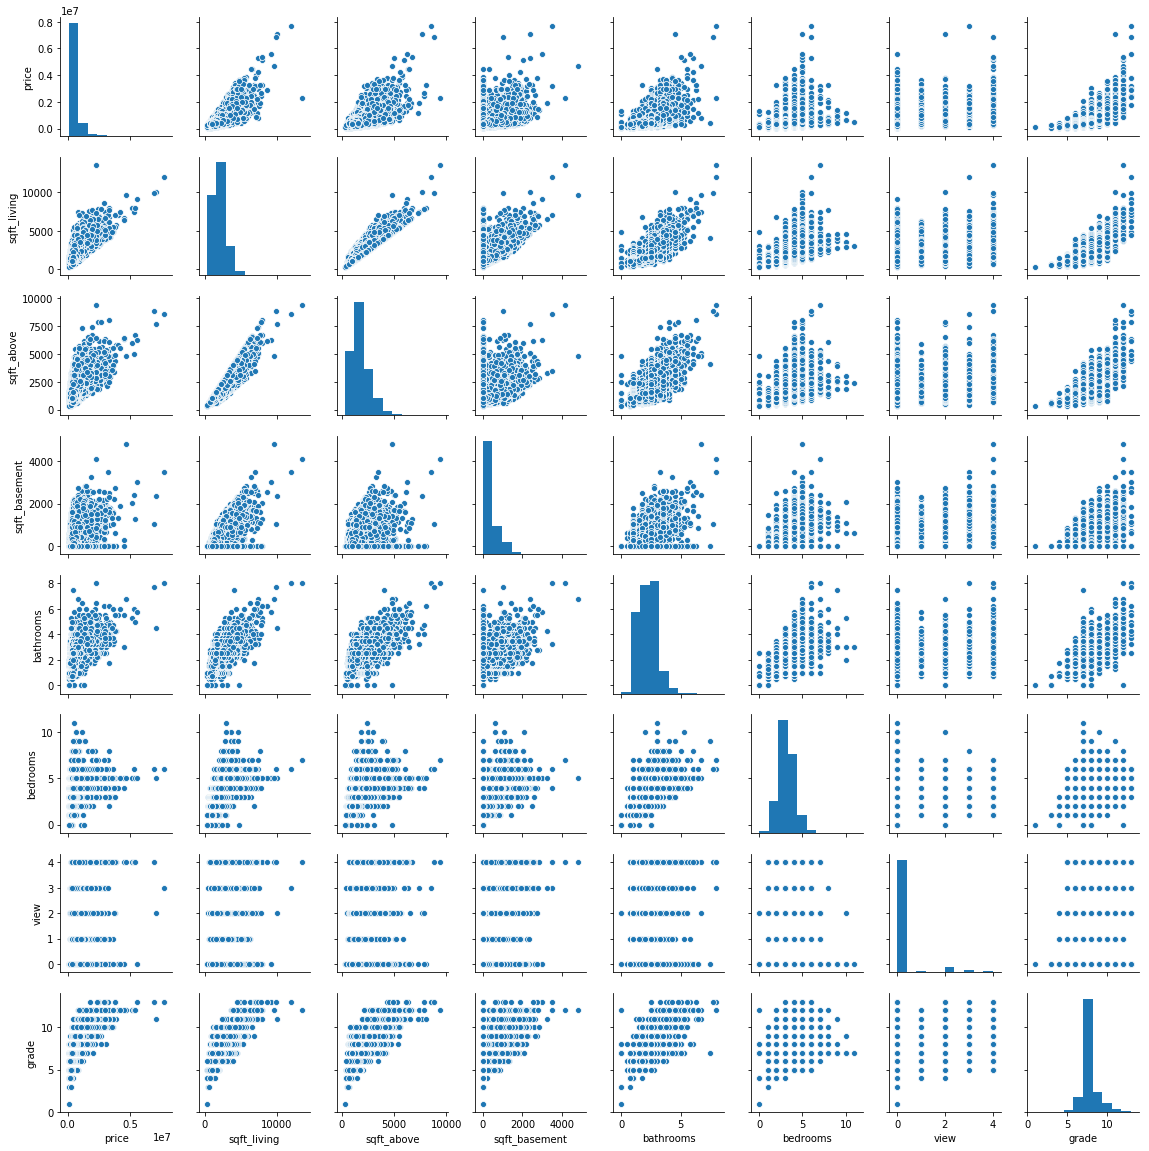

In [16]:
#Heatmap & Correlation observations¶
#The columns with the highest correlation with price are in order are: sqft_living, grade, sqft_above, sqft_living15, bathrooms, view, sqft_basement, and bedrooms The house size columns are closely correlated with each other. Particuarly, sqft_living with sqft_above, sqft_living with sqft_living15 The Sqft_living is closely correlated with both grade and number of bathrooms. Year built is negatively correlated with condition. There is a slight negative correlation between zipcode both sqft_living and year built.
#Pairplots
pair_cols = ['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms', 'view', 'grade']
sns.pairplot(house_df.loc[:, pair_cols], height=2)

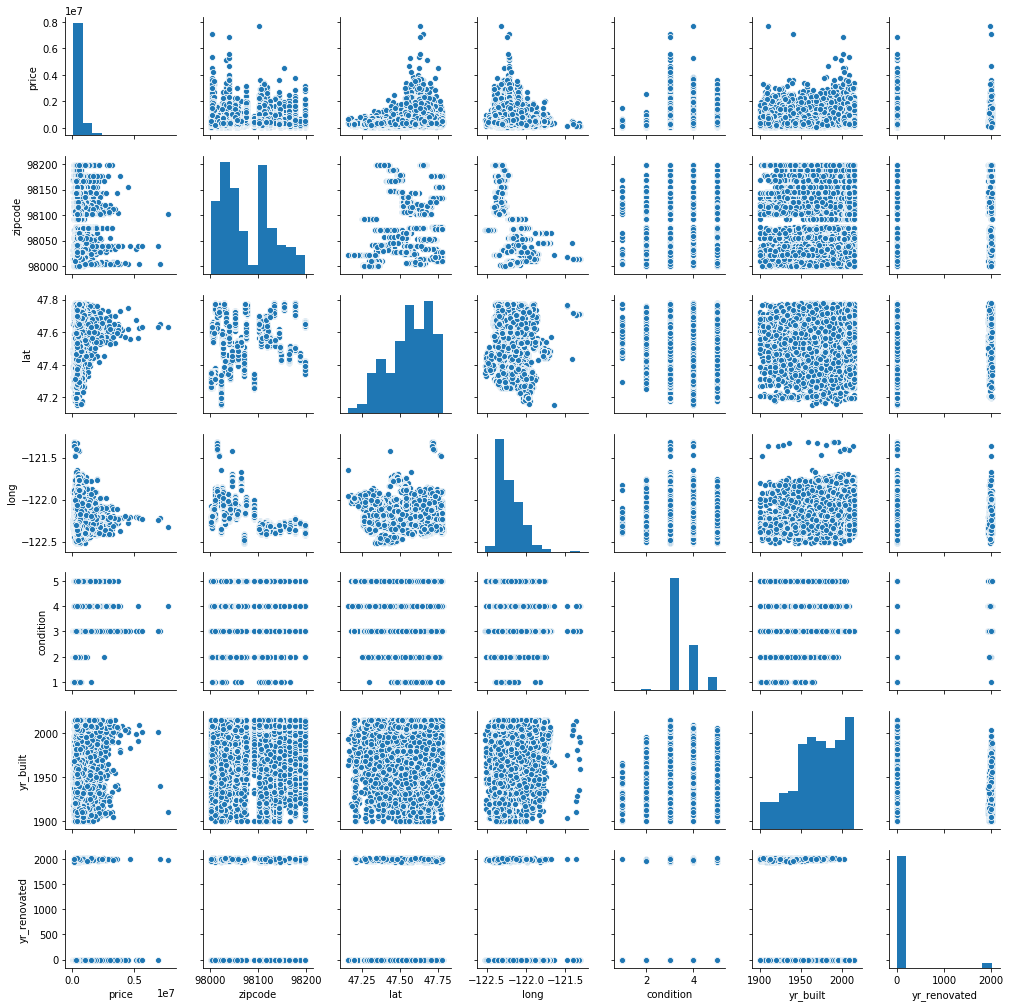

In [17]:
pair_cols = ['price', 'zipcode', 'lat', 'long', 'condition', 'yr_built', 'yr_renovated']
sns.pairplot(house_df.loc[:, pair_cols], height=2)

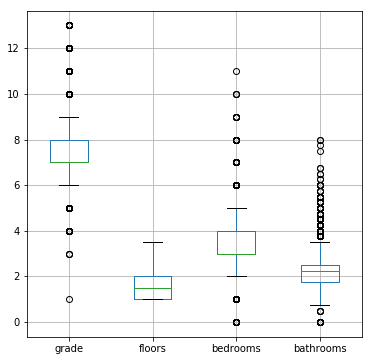

In [18]:
#Pairplot oberservations
#There appear to be a couple outliers skewing the ranges of the plots. In particular, bedrooms is the worst but price and sqft_living also seem to have some as well. The outlier in bedroom was removed (see comment above) and the plots were recomputed. Square feet, bedrooms, bathrooms, and grade show nice looking plots
#Boxplots
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
house_df.loc[:,['grade', 'floors', 'bedrooms', 'bathrooms']].boxplot(ax = ax)

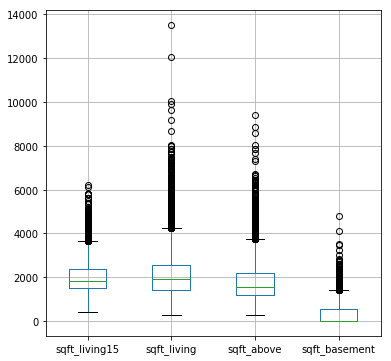

In [19]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis
house_df.loc[:,['sqft_living15', 'sqft_living', 'sqft_above', 'sqft_basement']].boxplot(ax=ax)

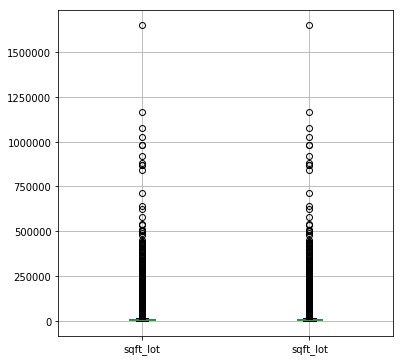

In [20]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis
house_df.loc[:,['sqft_lot', 'sqft_lot']].boxplot(ax = ax)

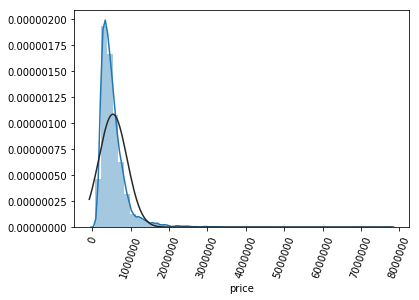

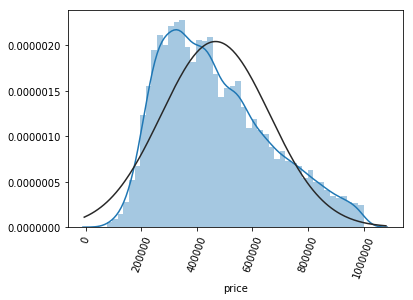

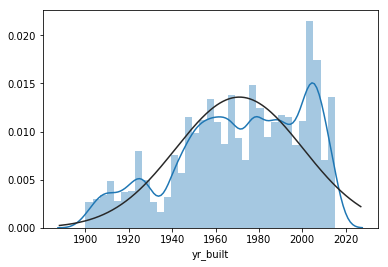

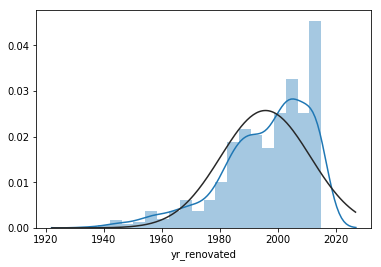

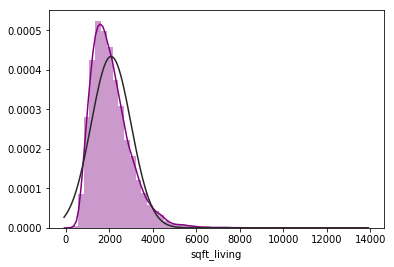

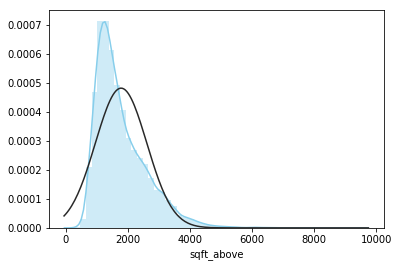

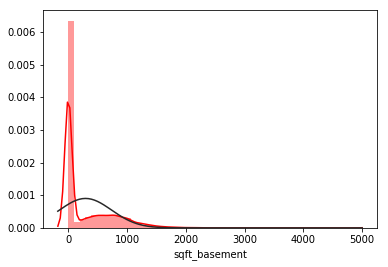

In [21]:
#Boxplot Observations
#The square foot columns have means in the middle of their quartiles, with whiskers that are also roughly the same length. For the square foot columns there are a large number of outliers above the top whisker. The mean of bedrooms, bathrooms, and floors seems to fall in the range of of 1.5 - 3
#PDF/Histograms
# all house prices
sns.distplot(house_df.loc[:, 'price'], fit=stats.norm);
plt.xticks(rotation=70)
plt.show();

# house prices < 1 million
sns.distplot(house_df.loc[house_df['price'] < 1000000, 'price'], fit=stats.norm);
plt.xticks(rotation=70)
plt.show();


# year built
sns.distplot(house_df.loc[:, 'yr_built'], fit=stats.norm);
plt.show();

# year renovated
sns.distplot(house_df.loc[house_df['yr_renovated'] > 1, 'yr_renovated'], fit=stats.norm);
plt.show();

# livable space
sns.distplot(house_df.loc[:, 'sqft_living'], color='purple', label='Sqft Living', fit=stats.norm);
plt.show();
sns.distplot(house_df.loc[:, 'sqft_above'], color='skyblue', label='Sqft Above', fit=stats.norm);
plt.show();
sns.distplot(house_df.loc[:, 'sqft_basement'], color='red', label='Sqft Basement', fit=stats.norm);
plt.show();

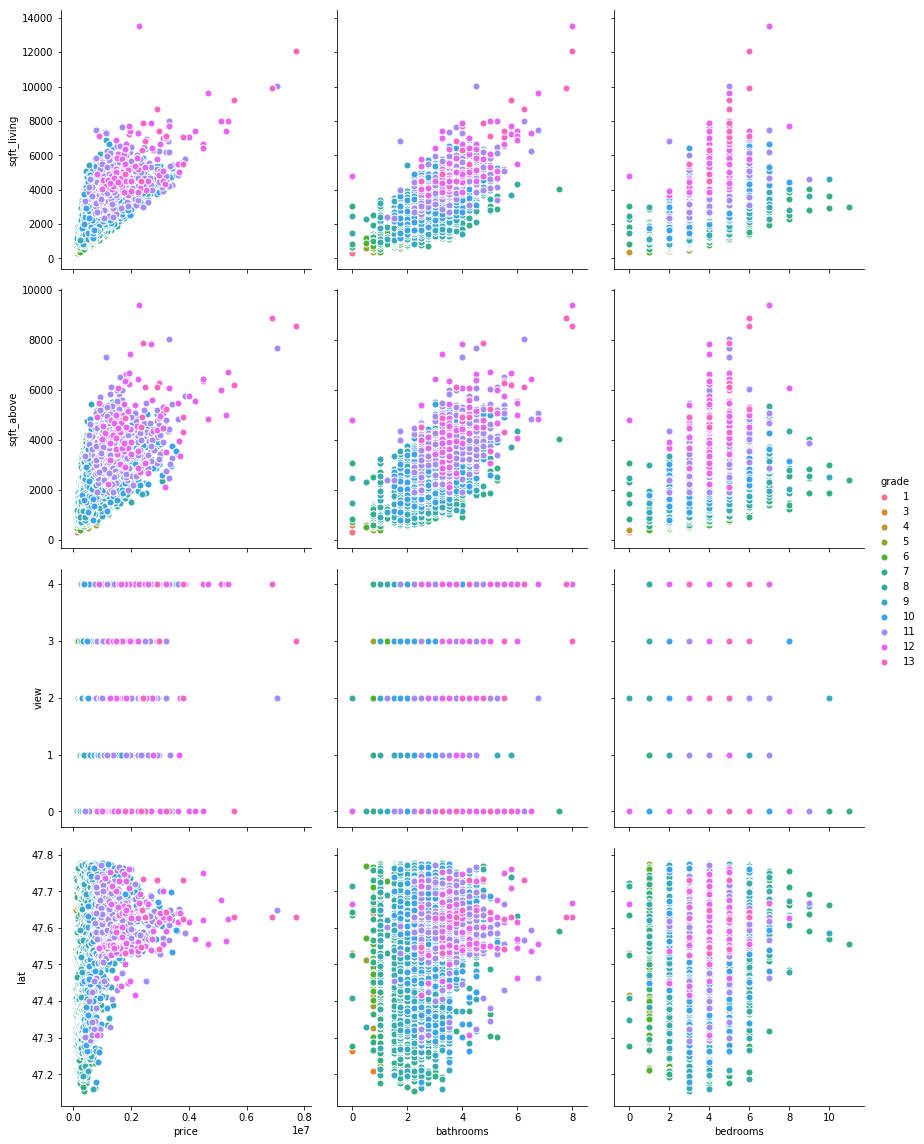

In [22]:
g = sns.PairGrid(house_df, x_vars=["price", "bathrooms", "bedrooms"], y_vars=["sqft_living", "sqft_above", "view", "lat"], height=4, hue="grade")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

Conclusions
Problem: A developer interest in acquiring properties in King County Washington is interested in what home features (zip code, structure, and so on) would yield a high price. Solution: The features that contribute most to high price are the livable square feet with a correlation of 0.702, the grade with a correlation of 0.667, a large number of bahtrooms with a 0.525, and a view 0.397.

In [41]:
#### explore the dataset supported by charts and summary statistics; identify a likely distribution for several of the features; compute basic summary statistics by both classical, bootstrap, and Bayesian methods; compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.
##explore the dataset supported by charts and summary statistics; identify a likely distribution for several of the features; compute basic summary statistics by both classical, bootstrap, and Bayesian methods; compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.
# Read the .csv file with the pandas read_csv method
import pandas
import numpy
import matplotlib
from matplotlib import pyplot
import seaborn
import scipy
import itertools
%matplotlib inline


In [42]:
eye_hair = pandas.DataFrame({
    'black': [0.11, 0.03, 0.03, 0.01], 
    'brunette': [0.2, 0.14, 0.09, 0.05],
    'red': [0.04, 0.03, 0.02, 0.02],
    'blond': [0.01, 0.16, 0.02, 0.03],
}, index=['brown', 'blue', 'hazel', 'green'])

eye_hair

,black,brunette,red,blond
brown,0.11,0.20,0.04,0.01
blue,0.03,0.14,0.03,0.16
hazel,0.03,0.09,0.02,0.02
green,0.01,0.05,0.02,0.03


In [43]:
#Note: here we're using a string index for eye color rather than a numeric zero-based index. So to access a given (eye, hair) color value, index the dataframe like so:
eye_hair.loc['hazel', 'red']

0.02

In [44]:
#The code in the cell below computes the marginal probabilities by both hair color and eye color. Execute this code and examine the result.
## Compute the marginal distribution of each eye color
eye_hair['marginal_eye'] = eye_hair.sum(axis=1)
eye_hair

,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11


In [45]:
eye_hair.sum(axis=0)

black           0.18
brunette        0.48
red             0.11
blond           0.22
marginal_eye    0.99
dtype: float64

In [46]:
eye_hair.loc['marginal_hair'] = eye_hair.sum(axis=0)
eye_hair

,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11
marginal_hair,0.18,0.48,0.11,0.22,0.99


In [47]:
##Example:
##With a bit of theory in mind, let's pull things together with an example. Let's say we are interested in analyzing distracted drivers. We sample the behavior of 10 drivers at an intersection and determine if they exhibit distracted driving or not. The data are binomially distributed; a driver is distracted or not. In the example we will:

##Select a prior for the parameter $p$, the probability of distracted driving.
## Using data, compute the likelihood.
##Compute the posterior and posterior distributions. 
## Try another prior distribution.
## Add more data to our data set to updated the posterior distribution.
#The code in the cell below creates a simple data set of distracted drivers and computes some simple summary statistics. Execute this code. 
drivers = ['yes','no','yes','no','no','yes','no','no','no','yes']
distracted = [1 if x is 'yes' else 0 for x in drivers]
distracted

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [48]:
N = len(distracted)  # sample size
n_distracted = sum(distracted)  # number of distracted drivers
n_not = N - n_distracted # number not distracted
print('Distracted drivers = %d Attentive drivers = %d'
    '\nProbability of distracted driving = %.1f' 
      % (n_distracted, n_not, n_distracted / (n_distracted + n_not)))

Distracted drivers = 4 Attentive drivers = 6
Probability of distracted driving = 0.4


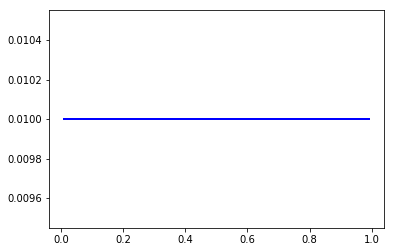

In [49]:
#The code in the cell below computes and plots the uniform prior distribution. Execute this code and examine the results.
N = 100
p = numpy.linspace(.01, .99, num=N)
pp = [1./N] * N
pyplot.plot(p, pp, linewidth=2, color='blue')

Text(0, 0.5, 'Likelihood')

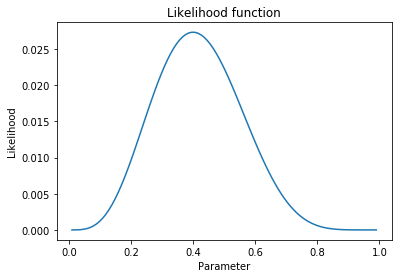

In [50]:
##Next, we need to compute the likelihood. The likelihood is the probability of the data given the parameter. We can view the observation of each driver as distracted or not as a Bernoulli trial, so we will use the binomial distribution.
#The code in the cell below computes and plots the binomial likelihood for the distracted driver data. This calculation is performed for each value we are sampling. Execute this code and examine the results.
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, distracted)
pyplot.plot(p, l)
pyplot.title('Likelihood function')
pyplot.xlabel('Parameter')
pyplot.ylabel('Likelihood')

In [51]:
##Now that we have a prior and a likelihood we are in a position to compute the posterior distribution of the parameter . The code in the cell below computes and plots the posterior, given the prior and likelihood.
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

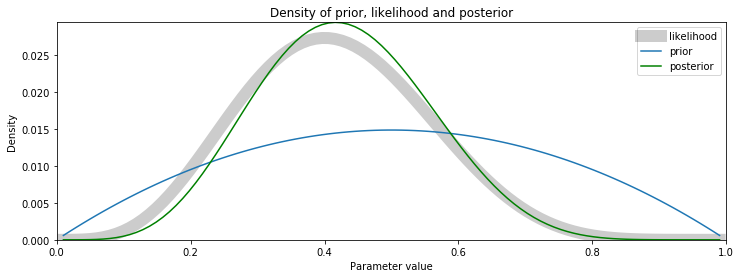

In [53]:
##You can see from the plots above, that the beta distribution can take on quite a range of shapes, depending on the parameters. the distribution skews to the rights
##We still do not know a lot about the behavior of drivers, so we will pick a rather vague or broad beta distribution as our prior. The code in the cell below uses a symmetric prior with  𝑎=2
##Execute this code and examine the result.
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)

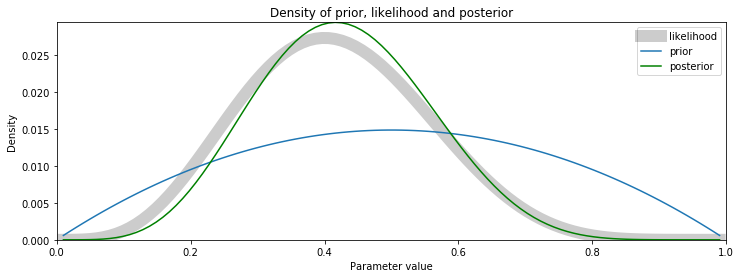

In [54]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [55]:
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

Maximum of the prior density = 0.015
Maximum likelihood = 0.027
MAP = 0.029


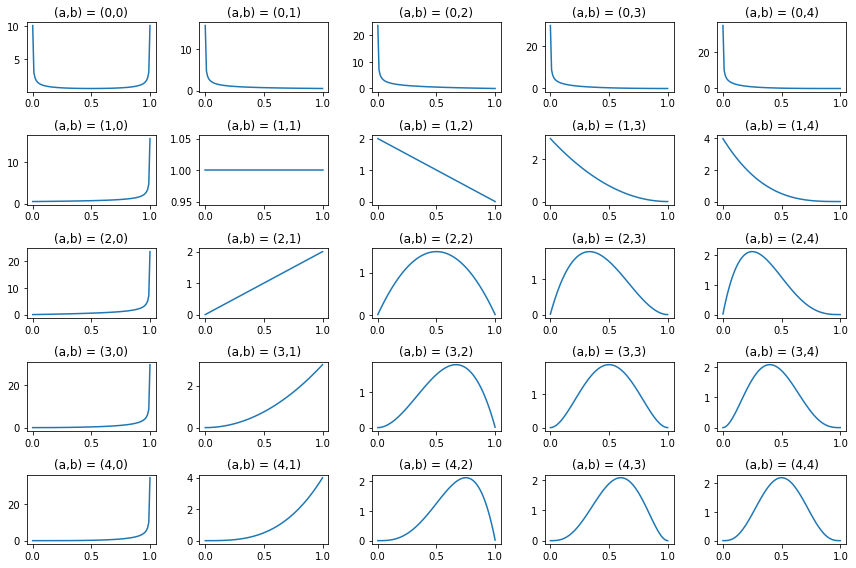

In [56]:
#Another Prior
pyplot.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = numpy.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    pyplot.subplot(len(alpha), len(beta), i+1)
    pyplot.plot(x, scipy.stats.beta.pdf(x, a, b))
    pyplot.title('(a,b) = (%d,%d)' % (a,b))
pyplot.tight_layout() 

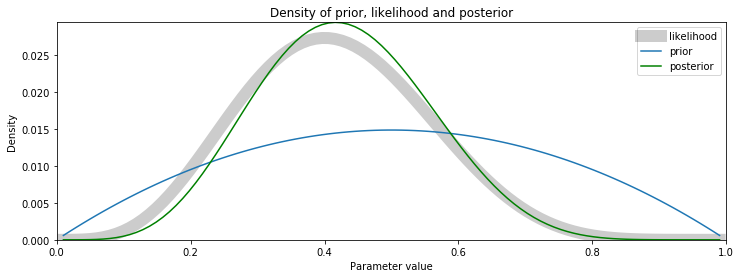

In [57]:
# =.1 You can see from the plots above, that the beta distribution can take on quite a range of shapes, depending on the parameters. the distribution skews to the rights
# 2->We still do not know a lot about the behavior of drivers, so we will pick a rather vague or broad beta distribution as our prior. The code in the cell below uses a symmetric prior with  𝑎=2
#Execute this code and examine the result.
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)


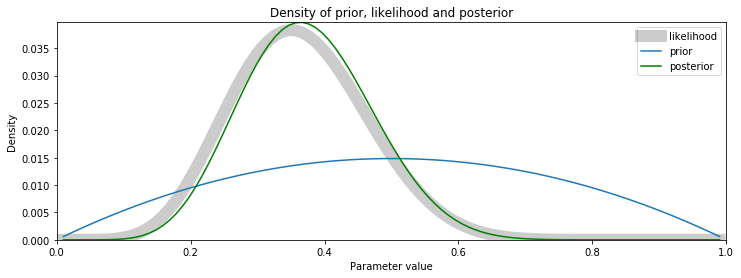

In [58]:
#Notice that the mode of the posterior is close to the mode of the likelihood, but has shifted toward the mode of the prior. We call this tendency of Bayesian posteriors to be shifted toward the prior the shrinkage property. The tendency of the maximum likelihood point of the posterior is said to shrink toward the maximum likelihood point of the prior.
#We can now see that the posterior probability of distracted driving has a rather wide spread. How can we get a more definitive understanding of the probability of distracted driving?
#The code in the cell below adds another 10 observations to our data set. Execute this code and examine the results. How do the likelihood and posterior distributions compare with the case with only 10 data points.
new_drivers = ['no','yes','no','no','no',
          'yes','no','yes','no','no']  # Some new data
new_distracted = [1 if x is 'yes' else 0 for x in new_drivers]

l = likelihood(p, distracted + new_distracted)
post = posterior(pp, l)
plot_post(pp, l, post, p)

The 0.950 credible interval is 0.025 to 0.975


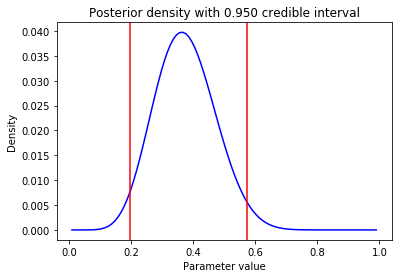

In [59]:
#Credible Intervals
##A credible interval is an interval on the Bayesian posterior distribution. The credible interval is sometime called the highest density interval (HDI), or highest posterior density interval (HPI). As an example, the 90% credible interval encompasses the 90% of the posterior distribution with the highest probability density.
##The credible interval is the Bayesian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution of the parameter. For symmetric distributions the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = numpy.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))
    
plot_ci(p, post, num_samples, lower_q, upper_q)

Text(0, 0.5, 'Probability')

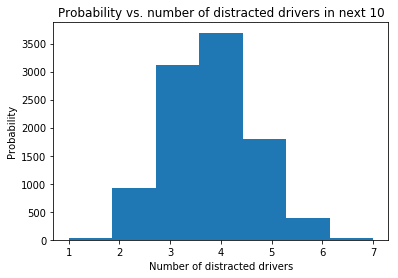

In [60]:
#Simulating from the posterior distribution: forecasting
#So far, we have computed the posterior distribution of the probability parameter But what about the distribution of distracted drivers? We can compute this distribution by simulating from the posterior distribution.The code in the cell below simulates and plots the distribution of distracted drivers. Run this code and examine the results.
num_cars = 10
num_samples = 10000

counts = (10 * numpy.random.choice(p, size=num_samples, replace=True, p=post)).round()
pyplot.hist(counts, bins=int(max(counts)))
pyplot.title('Probability vs. number of distracted drivers in next %d' % num_cars)
pyplot.xlabel('Number of distracted drivers')
pyplot.ylabel('Probability')

In [61]:
#Comparing Bayesian models
#How can we use Bayesian models to compare two distributions? It turns out that we can compare Bayesian models in several ways. In this lesson, we will compute and compare confidence intervals of the posterior distribution of a model parameter.
families = pandas.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/GaltonFamilies.csv', 
                           index_col=0)
families.head()

,father,mother,midparentHeight,children,childNum,gender,childHeight
family,,,,,,,
001,78.5,67.0,75.43,4,1,male,73.2
001,78.5,67.0,75.43,4,2,female,69.2
001,78.5,67.0,75.43,4,3,female,69.0
001,78.5,67.0,75.43,4,4,female,69.0
002,75.5,66.5,73.66,4,1,male,73.5


Mean of heights: 67.1


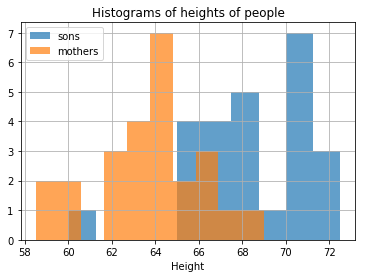

In [62]:
num_samples = 25
male = families[families.gender == 'male'].sample(n=num_samples)

pyplot.title('Histograms of heights of people')
male.childHeight.hist(label='sons', bins=10, alpha=.7)
male.mother.hist(label='mothers', bins=10, alpha=.7)
pyplot.xlabel('Height')
pyplot.legend()

mean_height = numpy.concatenate([male.mother, male.father, male.childHeight,]).mean()
print('Mean of heights: %.1f' % mean_height)

Mean = 68.344, Standard deviation = 2.757


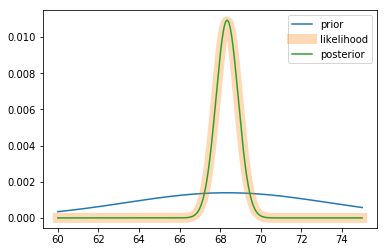

In [63]:
#To simplify the computations here, we will only estimate the posterior distribution of the mean. We will use a fixed empirical estimate of the standard deviation. A more complete analysis will also estimate the posterior distribution of the standard deviation.
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_son, label='posterior')
pyplot.legend()

Mean = 68.344, Standard deviation = 2.757


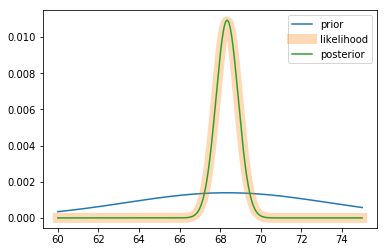

In [64]:
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_son, label='posterior')
pyplot.legend()

Mean = 63.648, Standard deviation = 2.436


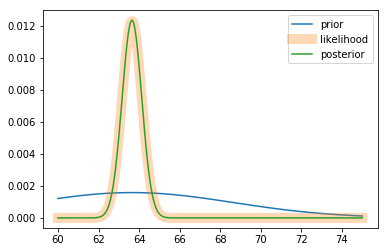

In [65]:
#The code in the cell below computes the posterior distribution of the heights of the mothers. Run this code and examine the results. How do these results differ from the results for the heights of the sons?
pp_mom = scipy.stats.norm.pdf(p, loc=male.mother.mean(), scale=5)
pp_mom = pp_mom / pp_mom.sum() # normalize

like_mom = comp_like(p, male.mother)
post_mom = posterior(pp_mom, like_mom)

pyplot.plot(p, pp_mom, label='prior')
pyplot.plot(p, like_mom, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_mom, label='posterior')
pyplot.legend()

The 0.950 credible interval is 0.025 to 0.975


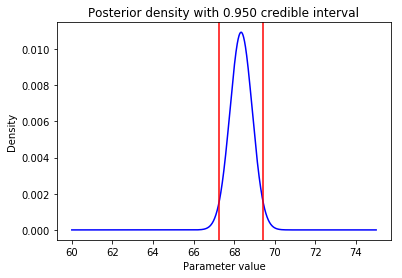

In [66]:
#To compare the posterior distributions of the mean heights of the sons to the distribution of the mean heights of the mothers, we compute and compare the confidence intervals.
#Run the code in the cell below which computes and plots the confidence intervals for the mean heights of the sons.
num_samples = 100000

plot_ci(p, post_son, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


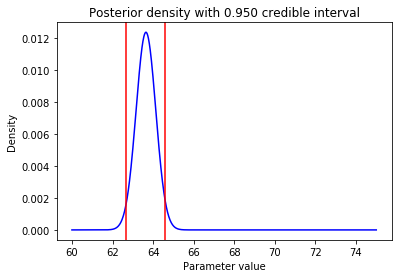

In [67]:
#Next, compute and plot the posterior distribution and CIs of the mean of the heights of the mothers.
plot_ci(p, post_mom, num_samples, lower_q=.025, upper_q=.975)

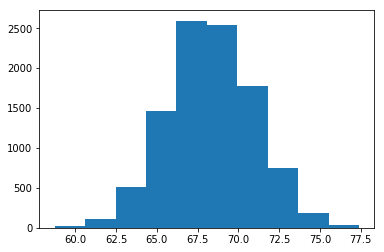

In [68]:
#Simulation from the Posterior Distribution
#The code in the cell below computes the posterior distribution of the heights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is plotted along with the histogram of the original data. Execute this code and examine the results.
def sim_height(n, sigma, p, post):
    # create the probability-weighted random sample of values of the mean height
    mu = numpy.random.choice(p, size=n, replace=True, p=post)
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=n)

_ = pyplot.hist(sim_height(10000, sigma=2.616329, p=p, post=post_son))

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


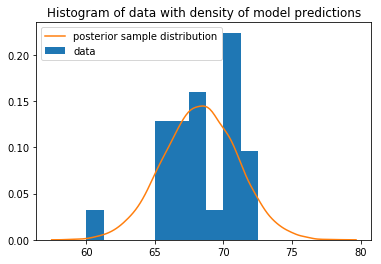

In [69]:
def plot_dist(n, post, dat):
    pyplot.hist(dat, normed=True, label='data')
    seaborn.kdeplot(post, label='posterior sample distribution')
    pyplot.title('Histogram of data with density of model predictions')

sim_vals = sim_height(10000, sigma=2.616329, p=p, post=post_son)
plot_dist(10000, sim_vals, male.childHeight)

Summary
We have explored the following concepts: dataset supported by charts and summary statistics; identify a likely distribution for several of the features; compute basic summary statistics by both classical, bootstrap, and Bayesian methods; compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

# Milestone 3: Independent Project
Author - Ajai Shukla Project Guidance and Instructions Milestone 3 allows you to apply the knowledge you gained in Unit 3 of the course. In this milestone, you need to prepare the data for modeling as well as build an initial model that you will need to refine for Milestone 4..
For Milestone 3 you should
prepare the data via cleaning, normalization, encoding, et cetera; and generate and evaluate a working model (linear, or time series).

In [1]:
#Load and clean the data
#The dataset is the production amount of several diary products in California, month by month, for 18 years. Our goal: forecast the next year production for one of those products: milk.
# Load necessary libraries

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = r"C:\Users\ashukla\Documents\DS\cadairydata.csv"
df = pd.read_csv(file,encoding="ISO-8859-1")
df.head()

,Unnamed: 0,Year.Month,Month.Number,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price
0,1,1995.01,1,1995,Jan,4.370,51.595,2.112,0.9803
1,2,1995.02,2,1995,Feb,3.695,56.086,1.932,0.8924
2,3,1995.03,3,1995,Mar,4.538,68.453,2.162,0.8924
3,4,1995.04,4,1995,Apr,4.280,65.722,2.130,0.8967
4,5,1995.05,5,1995,May,4.470,73.730,2.227,0.8967


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
Unnamed: 0           228 non-null int64
Year.Month           228 non-null float64
Month.Number         228 non-null int64
Year                 228 non-null int64
Month                228 non-null object
Cotagecheese.Prod    228 non-null float64
Icecream.Prod        228 non-null float64
Milk.Prod            228 non-null float64
N.CA.Fat.Price       228 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 16.1+ KB


In [4]:
#The first step is to have a Pandas date column which could be used as the time index.
#Add Pandas date-time column The fastest way is to convert year and month to strings, then create a new Pandas datetime column #that combine them.
df['Month'] = df['Month'].str[:3]

df = df.rename(columns={"Month.Number":"Month","Month":"Month.Name"})
df['Day'] = pd.Series(['01']*len(df))
df['Date'] =pd.to_datetime(df[["Year","Month","Day"]])

df = df.drop(["Unnamed: 0","Year.Month","Cotagecheese.Prod","Icecream.Prod","N.CA.Fat.Price","Day"],
             axis=1)

df.head()

,Month,Year,Month.Name,Milk.Prod,Date
0,1,1995,Jan,2.112,1995-01-01
1,2,1995,Feb,1.932,1995-02-01
2,3,1995,Mar,2.162,1995-03-01
3,4,1995,Apr,2.130,1995-04-01
4,5,1995,May,2.227,1995-05-01


In [5]:
#and I prefer to rename some of the other columns, for clarity:
df.rename(columns={'Cotagecheese.Prod':'CottageCheeseProd',
                  'Icecream.Prod':'IceCreamProd',
                  'Milk.Prod':'MilkProd',
                  'N.CA.Fat.Price':'Price',
                  'Month.Number' : 'MonthNumber'},
          inplace=True)
df.head()

,Month,Year,Month.Name,MilkProd,Date
0,1,1995,Jan,2.112,1995-01-01
1,2,1995,Feb,1.932,1995-02-01
2,3,1995,Mar,2.162,1995-03-01
3,4,1995,Apr,2.130,1995-04-01
4,5,1995,May,2.227,1995-05-01


In [6]:
df.tail()

,Month,Year,Month.Name,MilkProd,Date
223,8,2013,Aug,3.400,2013-08-01
224,9,2013,Sep,3.197,2013-09-01
225,10,2013,Oct,3.338,2013-10-01
226,11,2013,Nov,3.275,2013-11-01
227,12,2013,Dec,3.473,2013-12-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
Month         228 non-null int64
Year          228 non-null int64
Month.Name    228 non-null object
MilkProd      228 non-null float64
Date          228 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 9.0+ KB


In [8]:
#Now, we can perform both arithmetic and logical operations on datetime objects (“YearMonth“). As an example, here is how to select the last 12 months of dairy data:

df[df.Date > "2012-12-01"]

,Month,Year,Month.Name,MilkProd,Date
216,1,2013,Jan,3.462,2013-01-01
217,2,2013,Feb,3.231,2013-02-01
218,3,2013,Mar,3.676,2013-03-01
219,4,2013,Apr,3.622,2013-04-01
220,5,2013,May,3.720,2013-05-01
221,6,2013,Jun,3.489,2013-06-01
222,7,2013,Jul,3.373,2013-07-01
223,8,2013,Aug,3.400,2013-08-01
224,9,2013,Sep,3.197,2013-09-01
225,10,2013,Oct,3.338,2013-10-01


In [9]:
#The Milk production should be in million of pounds.
df.isnull().values.any()

False

In [10]:
#There are no NaNs. The dataset is ready to be explored.
#Explore the data,We concentrate now on the milk production (the MilkProd column).
#Create a Time Series Plot
#First useful thing to do is always to plot the data:
import matplotlib.pyplot as plt
%matplotlib inline


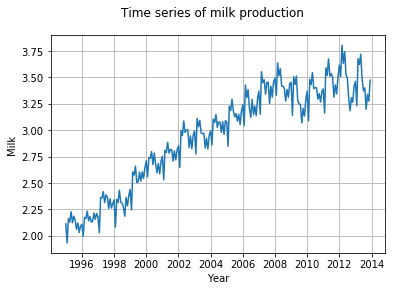

In [11]:
fig,ax = plt.subplots()
ax.plot(df.Date, df.MilkProd)
ax.grid(True)
ax.set_xlabel("Year")
ax.set_ylabel("Milk")
fig.suptitle("Time series of milk production");

# Statistical Properties of the Time Series
Autocorrelation is a fundamental property of time series. The Autocorrelation Function or ACF provides information on the dependency of the time series values of previous values.

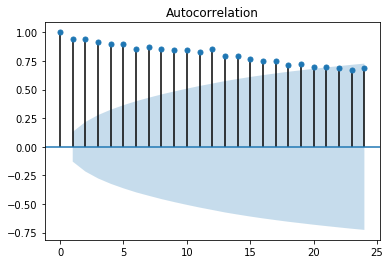

In [12]:
import statsmodels.graphics.tsaplots as sm_pl
sm_pl.plot_acf(df.MilkProd, lags=24);

Lags are the months in this case.
Note that the values of the ACF at the various lags decays only slowly. This indicates there is considerable auto correlation between the time series values at the various lags, mostly likely from the trend. Plotting a histogram provides information on the distribution of values of the time series.

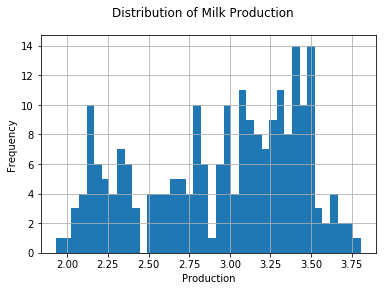

In [14]:
fig,ax = plt.subplots()
ax.hist(df.MilkProd, bins=40)
ax.grid(True)
ax.set_xlabel("Production")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Milk Production");

The histogram of the full milk production time series shows considerable dispersion. Again this behaviour is likely the result of the trend.

# Stationarity: are mean and standard deviation constant over time?
From the plot is pretty clear that there is trend and seasonality, therefore is not stationary. Anyway, can be checked, via the rolling() function from Pandas:

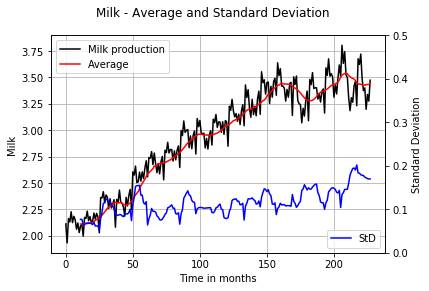

In [15]:
rollingMean = df.MilkProd.rolling(window=12).mean()
rollingStd = df.MilkProd.rolling(window=12).std()
 
fig,ax1 = plt.subplots()
ax1.plot(df.MilkProd, color="black", label="Milk production")
ax1.plot(rollingMean, color="red", label="Average")
ax1.grid(True)
ax1.set_xlabel("Time in months")
ax1.set_ylabel("Milk")
ax1.legend(loc="upper left")
 
ax2 = ax1.twinx() # Create a twin Axes sharing the xaxis
ax2.plot(rollingStd, color = "blue", label = "StD")
ax2.set_ylabel("Standard Deviation")
ax2.legend(loc="lower right")
ax2.set_ylim(0,0.5)
fig.suptitle("Milk - Average and Standard Deviation");

The mean is clearly increasing over time (the production is rising) but also the standard deviation of milk production increased in the time frame.

Decomposition of the Time Series

Time series are typically decomposed into three components: trend, seasonal, and the remainders, or residuals.
Trend can be modelled by several methods. We will start by decomposing the time series using a simple moving average model.

# Trend
The code in the cell below uses moving window method to compute the average of the time series over specified span, or order of the operator. As the moving window operator moves over the data, the average of the values in the windows is calculated.

In [16]:
import numpy as np
def movingAverage(values, order):
    end = len(values)
    out = np.zeros(len(values))
 
    out[0] = values[1]
    for i in range(1,end):
        if (i - order <= 1):
            j = 1
        else:
            j += 1
        out[i] = sum(values[j-1:i]) / (i-j+1)
 
    return out

One of the best ways to make a series stationary on variance is through transforming the original series through log transform. We go back to our original data series and add a new column, the logarithm of the milk production:

In [17]:
df['LogMilk'] = pd.Series(np.log(df.MilkProd), index = df.index)

Now we perform a 12 months moving average, to extract the trend:

In [19]:
trendM = movingAverage(df.LogMilk, 12)

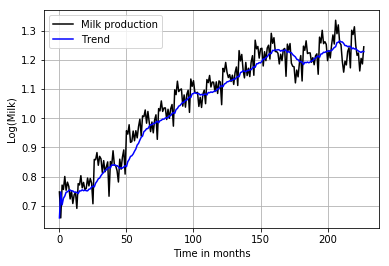

In [20]:
fig,ax = plt.subplots()
ax.plot(df.LogMilk, color="black", label="Milk production")
ax.plot(trendM, color="blue", label="Trend")

ax.grid(True)
ax.set_xlabel("Time in months")
ax.set_ylabel("Log(Milk)")
ax.legend(loc="upper left")

# Get the Trend with Lowess

Having tried a simple moving average decomposition, we will now use a Lowess model to determine the trend. Lowess is a sophisticated non-linear regression. The statsmodels package includes a function to calculate the Lowess regression:

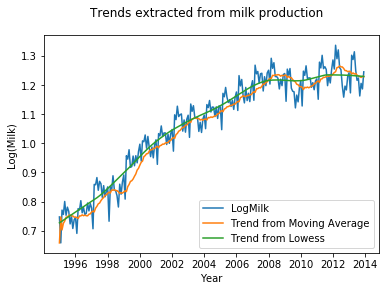

In [21]:
import statsmodels.nonparametric.smoothers_lowess as sm
 
trendL = sm.lowess(df.LogMilk, df.Date, frac=0.25,return_sorted=False)
 
fig,ax = plt.subplots()
ax.plot(df.Date, df.LogMilk)
ax.plot(df.Date, trendM, label='Trend from Moving Average')
ax.plot(df.Date, trendL, label="Trend from Lowess")
ax.set_xlabel("Year")
ax.set_ylabel("Log(Milk)")
ax.legend(loc="lower right")
fig.suptitle("Trends extracted from milk production");

The time series charts show the original time series along with the two trends. The trend from Lowess regression is a bit smoother than the one was obtained with the simple moving average decomposition.
Now we apply a linear regression on the Milk production using the months as variables to discover the seasonality. But first need to convert the months into categorical variables using the One Hot Encoder (OHE) approach.

In [22]:
monthsOHE = pd.get_dummies(df.Date)

The order doesn’t matter in this case (being numerical, October and November come before February but it’s ok).

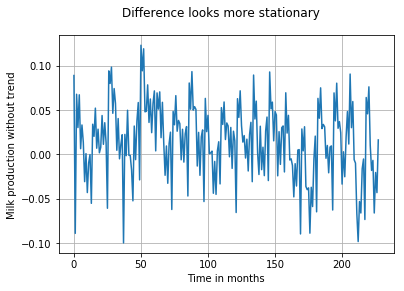

In [23]:
prodWithoutTrend = df.LogMilk - trendM
fig,ax = plt.subplots()
ax.plot(prodWithoutTrend)
 
ax.grid(True)
ax.set_xlabel("Time in months")
ax.set_ylabel("Milk production without trend")
 
fig.suptitle("Difference looks more stationary");

The milk production – when the trend is removed – seems more stationary, without any immediate pattern. We create now a temporary data frame to perform the regression:

In [24]:
    # a new tmp data frame for decomposition
decX = pd.DataFrame({'LogMilkNoTrend': prodWithoutTrend})
decX = decX.join(monthsOHE)

The regression is applied to the production without trend:

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
 
model.fit(monthsOHE, decX.LogMilkNoTrend)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

It’s a model with 12 variables (one for each month, keep in mind that they are not in chronological order):

In [26]:
model.coef_

array([ 0.08907963, -0.08907963,  0.06793817,  0.03038037,  0.06731869,
        0.00650067,  0.03327418,  0.01376031, -0.03068099,  0.0009393 ,
       -0.04300651, -0.0094902 , -0.00012787, -0.05518676,  0.03412216,
        0.02046707,  0.05228133,  0.00704271,  0.02853812,  0.00187625,
        0.00805665,  0.04394031,  0.01143671,  0.03582014,  0.01326613,
       -0.06073198,  0.09431579,  0.08012587,  0.09855416,  0.04646384,
        0.07436364,  0.05764775,  0.00469884,  0.04053499, -0.0049198 ,
        0.01095231,  0.02224418, -0.09984554,  0.02263395, -0.00138643,
        0.04989665, -0.000921  , -0.00112942, -0.0175573 , -0.05236188,
        0.03207621, -0.00586177,  0.03800607,  0.05861608, -0.02868002,
        0.12326811,  0.09440926,  0.11927979,  0.0481295 ,  0.0487087 ,
        0.07855175,  0.0361494 ,  0.06260302,  0.02459715,  0.05756532,
        0.07174345,  0.0040322 ,  0.06946489,  0.0511868 ,  0.07064452,
        0.01893717,  0.05886126,  0.01299169, -0.02350925,  0.00

We get the seasonality by predicting the value month by month:

In [27]:
seasonalM = model.predict(monthsOHE)

# Residuals
If we remove the seasonality from the difference between milk production and the trend, we will get the residuals or remainders:

In [28]:
remainderM = prodWithoutTrend - seasonalM

Finally, we put all together in a data frame that contains all decomposition elements: trend, seasonality and residuals

In [29]:
  # a data frame with all decompositions
decomposed = pd.DataFrame({'t': trendM, 's': seasonalM, 'r': remainderM})
decomposed.head()

,t,s,r
0,0.658556,0.089080,0.0
1,0.747635,-0.089080,0.0
2,0.703096,0.067938,0.0
3,0.725742,0.030380,0.0
4,0.733337,0.067319,0.0


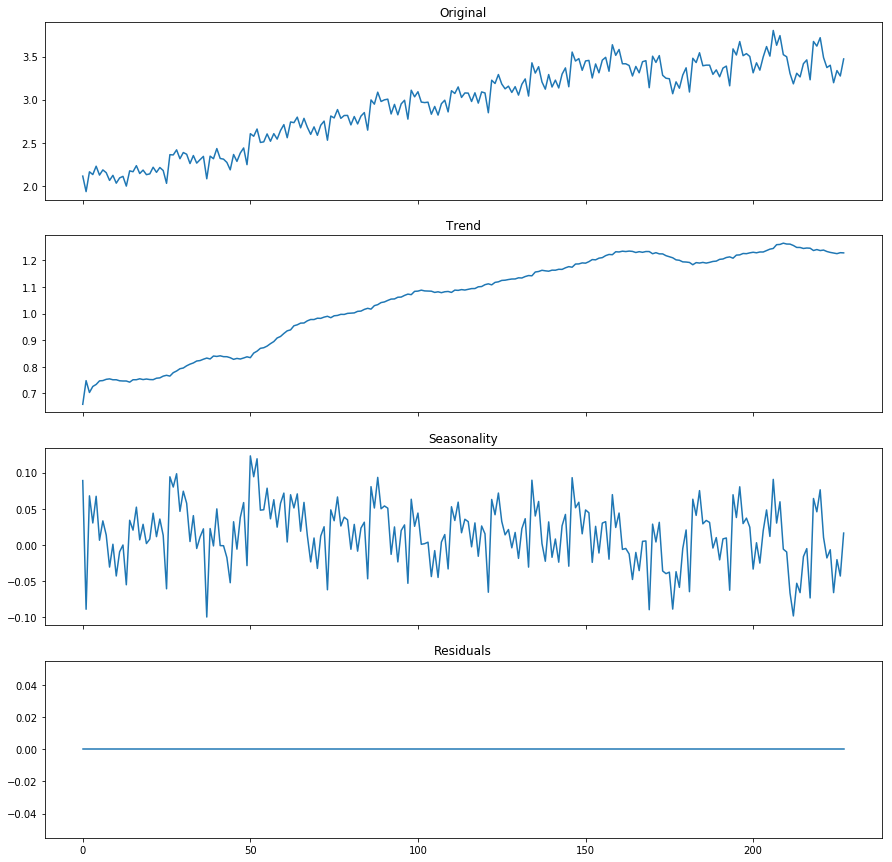

In [30]:
fig,ax = plt.subplots(4, sharex=True, figsize=(15,15))
ax[0].plot(df.MilkProd)
ax[0].set_title('Original')
 
ax[1].plot(decomposed.t)
ax[1].set_title('Trend')
 
ax[2].plot(decomposed.s)
ax[2].set_title('Seasonality')
 
ax[3].plot(decomposed.r)
ax[3].set_title('Residuals');

As we have seen, the trend is of an increasing milk production, beside the last months when it is stable; while there is a clear yearly seasonality.
The remainders in an ideal situation are like white noise, i.e. every pattern has been removed and what is left is only the random variability.

# Decomposing using statsmodels
The statsmodels package has also a function to decompose a time series:

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
# need to pass the time series as array (values) because of error
# in statsmodels, should be fixed in next version 0.9
decomposition = seasonal_decompose(df.MilkProd.values, freq=12)
 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

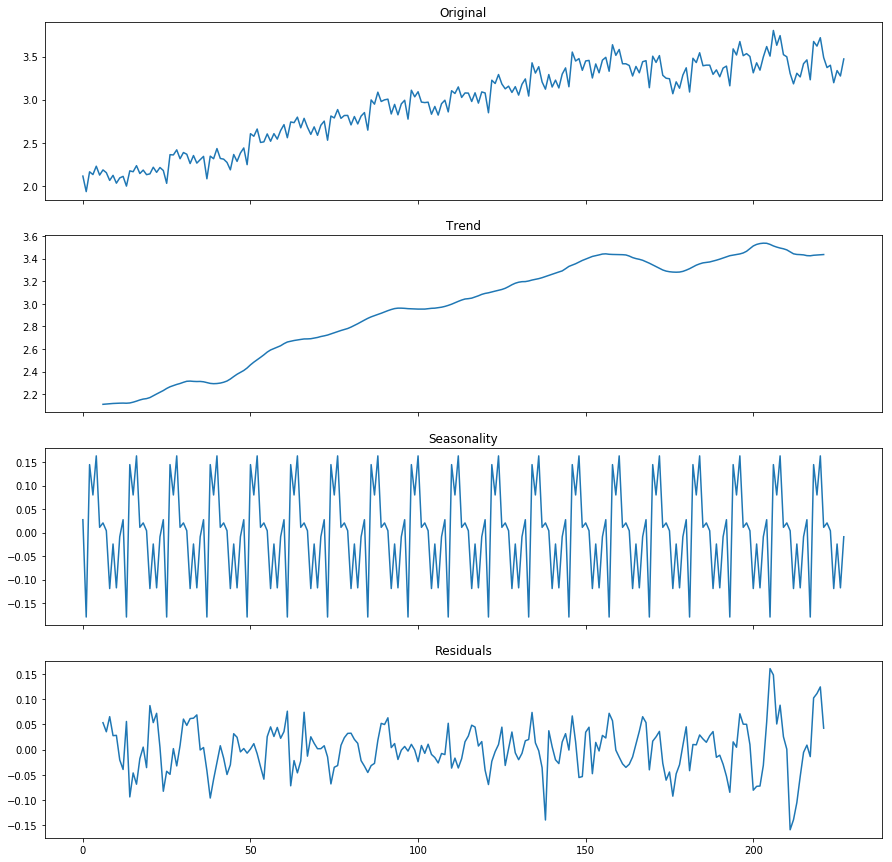

In [32]:
fig,ax = plt.subplots(4, sharex=True, figsize=(15,15))
ax[0].plot(df.MilkProd)
ax[0].set_title('Original')
 
ax[1].plot(trend)
ax[1].set_title('Trend')
 
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
 
ax[3].plot(residual)
ax[3].set_title('Residuals');

You can see the trend and seasonal components clearly separated in the above plots. The remainder plot looks fairly random, as expected.

# Is now stationary?
The question remains, is the remainder from this decomposition stationary? To find out, we plot its ACF:

sm_pl.plot_acf(decomposed.r, lags=24);

The ACF has at least 5 significant lag values, indicating the remainder is NOT, in fact, stationary.
Compared to the behavior of the ACF for the simple moving average decomposition, the behavior of the remainder is improved.
Now we plot the histogram of the remainder:

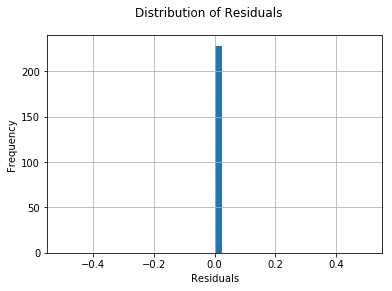

In [34]:
fig,ax = plt.subplots()
ax.hist(decomposed.r, bins=40)
ax.grid(True)
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Residuals");

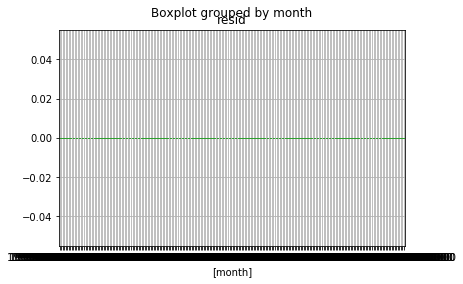

In [35]:
remaindersByMonth = pd.DataFrame({'resid': decomposed.r, 'month': df["Date"]})
 
remaindersByMonth.boxplot(by='month');

The remainder component shows only limited variation from month to month. The differences are within the interquartile range, indicating that the seasonal model is a reasonably good fit.

# Model a time series
Now that we have explored the decomposition of the time series we will now construct and test Autoregressive Moving Average (ARMA) models for the remainder of the time series. We will create and test these models in three steps, first creating a moving average (MA) model, then creating an autoregressive (AR) model and finally an autoregressive moving average (ARMA) model.

# Seasonal ARIMA model
The statsmodels package (from version 0.8) includes a function to model a seasonal arima. We see how it works first using as parameters AR=1 and MA=0, plus the difference set to 1 to indicate that we want a data transformation to remove the trend and seasonality.

In [40]:
# split into train and test (last two years) sets
testSize = 24
milkData = df.LogMilk.values
train, test = milkData[0:-testSize], milkData[-testSize:]

In [46]:
import statsmodels.api as sm_sa
firstModel = sm_sa.tsa.statespace.SARIMAX(df.LogMilk.values, order=(1,1,0),
                                      seasonal_order=(1,1,0,12))
results = firstModel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 551.412
Date:                            Sun, 09 Jun 2019   AIC                          -1096.824
Time:                                    19:40:41   BIC                          -1086.712
Sample:                                         0   HQIC                         -1092.738
                                            - 228                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1920      0.068     -2.844      0.004      -0.324      -0.060
ar.S.L12      -0.5304      0.059     -9.044      0.000      -0.645      -0.415
sigma2         0.0003   2.75e-05     12.383      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      105.52   Jarque-Bera (JB):                 8.24
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.82   Skew:                             0.08
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
bestModel = sm_sa.tsa.statespace.SARIMAX(df.LogMilk.values, order=(1,1,1),
                                      seasonal_order=(2,1,1,12))
results = bestModel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 580.393
Date:                            Sun, 09 Jun 2019   AIC                          -1148.786
Time:                                    19:41:49   BIC                          -1128.562
Sample:                                         0   HQIC                         -1140.614
                                            - 228                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5427      0.279      1.942      0.052      -0.005       1.090
ma.L1         -0.6859      0.245     -2.802      0.005      -1.166      -0.206
ar.S.L12      -0.1931      0.133     -1.448      0.148      -0.455       0.068
ar.S.L24      -0.1692      0.096     -1.765      0.078      -0.357       0.019
ma.S.L12      -0.7016      0.098     -7.172      0.000      -0.893      -0.510
sigma2         0.0002   1.77e-05     13.993      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       45.63   Jarque-Bera (JB):                28.18
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.02
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

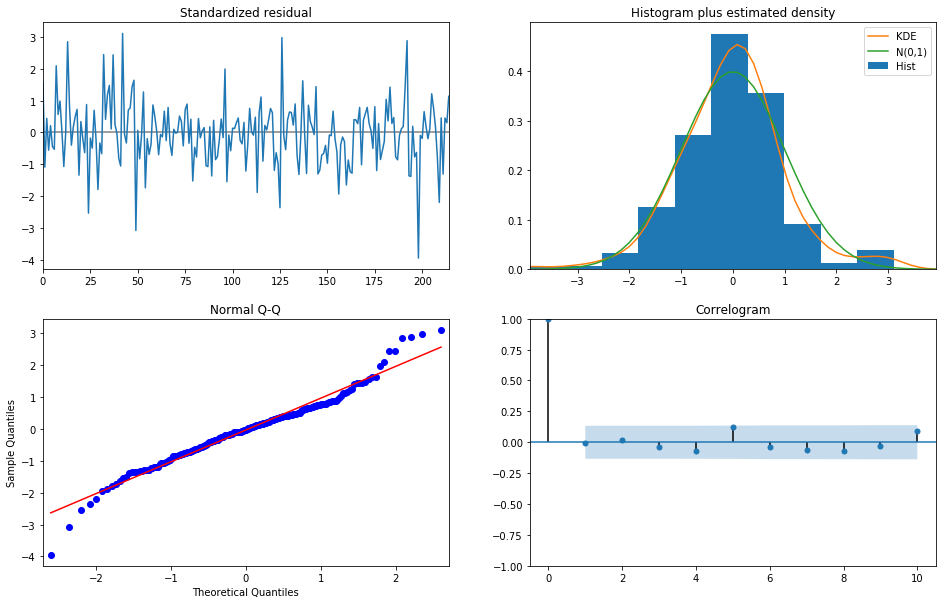

In [49]:
results.plot_diagnostics(figsize=(16, 10));

# Forecast
It is easy to forecast values using the previously fitted model. The get_prediction and conf_int methods calculate predictions for future points in time for the previously fitted model and the confidence intervals associated with a prediction, respectively.

the last 12 months

In [50]:
HISTORIC =df.shape[0]
PRED = 12

In [51]:
last12m = results.get_prediction(start=HISTORIC-PRED+1,
                                 end=HISTORIC,
                                 dynamic=False, full_results=True)

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

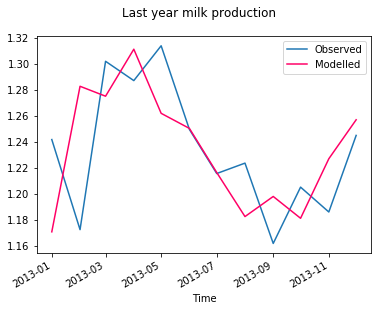

In [52]:
fig,ax = plt.subplots()
ax.plot(df.Date[-PRED:], df.LogMilk[-PRED:], label="Observed")
ax.plot(df.Date[-PRED:], last12m.predicted_mean, label='Modelled', color='#ff0066');
  # avoid overlapping of ticks on x ax
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
 
ax.set_xlabel("Time")
ax.legend(loc='upper right')
fig.suptitle("Last year milk production");

In [53]:
rmse = ((last12m.predicted_mean - df.LogMilk[-PRED:]) ** 2).mean()
rmse

0.0022007246056385092

Both the plot and the RMSE are quite good.
Summary: The original time series of milk production is show in blue in the plot above. The forecast is show in red. The 95 percent confidence intervals are shown in lighter shades of red.

It is obvious that, the further we try to extrapolate the time series evolution into the future, the less confident our prediction becomes. Hence, the confidence bound widens in the course of time.